# < 데이콘 x BDA 학습자 수료 예측 AI 경진대회 >

## [주제]
학습자의 수료 여부를 예측하는 AI 알고리즘 개발


## [설명]
BDA 8기 학습자 데이터를 분석하여 9기 학습자의 수료 여부를 예측하는 AI 알고리즘 개발

## [링크]
https://dacon.io/competitions/official/236519/overview/description



# 1. 데이터 불러오기



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학습자수요예측data/train.csv')
#test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학습자수요예측data/test.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학습자수요예측data/sample_submission.csv')

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

# 2. 데이터 탐색

In [ ]:
train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,...,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participitation,idea_contest,onedayclass_topic,withdrawal
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),NaN,False,대학생,4,NaN,...,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,NaN,NaN,C++ 응용,1
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,NaN,...,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,NaN,NaN,.,1
2,TRAIN_0002,8,1ed9296bd2a05ea36fabb5171a003b7320bb21a53d6135...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,4,NaN,...,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서,스포츠분석 기업,AI,139ac02d03d83f839197195e65bc1810ef5282ade32d80...,NaN,C언어 기초,1
3,TRAIN_0003,8,5ec50ef5a0c0416652f8d67a89ef4c02eb0c6a61b5d0a8...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,7,NaN,...,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.,토스,AI,NaN,NaN,현직자의 취업과정,0
4,TRAIN_0004,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,7,NaN,...,"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,100명 이상의 리스너와 10명 이상의 현직자,많은 현직자분들의 이야기를 듣고싶어서,네이버 카카오,금융,NaN,NaN,C언어,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1056 non-null   object 
 1   generation                       1056 non-null   int64  
 2   school1                          1056 non-null   object 
 3   major type                       1049 non-null   object 
 4   major1_1                         1051 non-null   object 
 5   major1_2                         493 non-null    object 
 6   major_data                       1056 non-null   bool   
 7   job                              1056 non-null   object 
 8   class1                           1056 non-null   int64  
 9   class2                           101 non-null    float64
 10  class3                           2 non-null      float64
 11  class4                           1 non-null      float64
 12  re_registration     

In [ ]:
# 데이터셋 크기 및 클래스 분포 확인
print(train.shape)

print("클래스별 개수:")
print(train['withdrawal'].value_counts())

print("클래스별 비율:")
print(train['withdrawal'].value_counts(normalize=True))

(1056, 46)
클래스별 개수:
withdrawal
1    730
0    326
Name: count, dtype: int64
클래스별 비율:
withdrawal
1    0.691288
0    0.308712
Name: proportion, dtype: float64


# 3. 데이터 전처리

## (1) 결측치 많은 행 제거

In [ ]:
# 행별로 결측치 개수 세기
row_missing_count = train.isnull().sum(axis=1)

# 결측치가 15개 이상인 행만 추출
train_missing_rows = train.loc[row_missing_count >= 15, 'ID']

print(train_missing_rows)

60     TRAIN_0060
227    TRAIN_0227
313    TRAIN_0313
390    TRAIN_0390
416    TRAIN_0416
466    TRAIN_0466
522    TRAIN_0522
606    TRAIN_0606
731    TRAIN_0731
781    TRAIN_0781
858    TRAIN_0858
Name: ID, dtype: object


In [ ]:
train = train.drop(train_missing_rows.index, axis=0)

## (2) 결측치 많은 칼럼 제거

In [ ]:
missing_ratio = train.isnull().mean()
high_missing = missing_ratio[missing_ratio >= 0.8]
print(high_missing)

class2                     0.905263
class3                     0.998086
class4                     0.999043
contest_award              1.000000
previous_class_3           0.835407
previous_class_4           0.835407
previous_class_5           0.835407
previous_class_6           0.835407
previous_class_7           0.835407
contest_participitation    0.824880
idea_contest               1.000000
dtype: float64


In [ ]:
train = train.drop(['ID', 'generation','class2','class3','class4',
                    'previous_class_3','previous_class_4','previous_class_5','previous_class_6','previous_class_7',
                    'incumbents_lecture_scale_reason'], axis=1)
test = test.drop(['ID', 'generation','class2','class3','class4',
                    'previous_class_3','previous_class_4','previous_class_5','previous_class_6','previous_class_7',
                    'incumbents_lecture_scale_reason'], axis=1)

## (3) 수동 매핑

In [ ]:
# desired_career_path
# 매핑 딕셔너리 정의
mapping = {
    "취업": "취업",
    "대학원 진학": "대학원 진학",
    "창업": "창업",
    "미정": "미정",
    "재직중": "재직중",
    "이직": "이직",
    "고시준비": "고시준비",
    "편입": "편입",
    "대학원 진학과 취업 중 고민": "미정",
    "대학원 진학과 취업 중 어느 것을 선택할지 고민중": "미정",
    "대학원 진학과 취업중에 하나를 고민하고 있습니다.": "미정",
    "대학원 진학 혹은 취업": "미정",
    "고민 중": "미정",
    "-": "미정",
    "대학원진학과 취업 둘중 고민입니다.": "미정",
    "대학원과 취업중 고민중입니다": "미정",
    "대학원 혹은 취업": "미정",
    "스타트업 및 중견": "취업",
    "아직 미정": "미정",
    "아직 미정입니다.": "미정",
    "싸피": "취업",
    "아직 정해지지않음": "미정",
    "아직 고민 중..": "미정",
    "아직 확실한 계획이 없습니다.": "미정",
    "취업 또는 대학원 진학": "미정",
    "취업 및 취업 중 특수대학원 계획": "미정",
    "현재 직장인, 추후 대학원 진학 예정": "대학원 진학",
}

# 매핑 적용
train["desired_career_path"] = train["desired_career_path"].map(mapping).fillna("unknown")
test["desired_career_path"] = test["desired_career_path"].map(mapping).fillna("unknown")


In [ ]:
# certificate_acquisition
COL = "certificate_acquisition"

# 매핑 딕셔너리 정의
def map_cert(x):
    if pd.isna(x):
        return "없음"
    x = str(x).strip()
    if x == "없음":
        return "없음"
    if "준비중" in x:   # 준비중이 들어가면 전부 없음
        return "없음"
    if x == "기타":
        return "있음"
    return "있음"       # 나머지는 전부 있음

# 매핑 적용
train["certificate_acquisition"] = train[COL].apply(map_cert)
test["certificate_acquisition"]  = test[COL].apply(map_cert)

In [ ]:
# incumbents_company_level
# 매핑 딕셔너리 정의
company_map = {
    # 국내 대기업 IT 계열
    "국내 대기업 IT 계열 (금융, 제조 ...)": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "금융권 IT 계열": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "증권사, 자산운용사, 은행, 금융공기업": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "카드사": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "반도체": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "반도체 공정 관련 직업": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "삼성전자 평가및분석 엔지니어 PE팀": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "국내 대기업 데이터 엔지니어": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "식품 유통 기업": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "스포츠 구단": "국내 대기업 IT 계열 (금융, 제조 ...)",
    "관광 분야 데이터 직무": "국내 대기업 IT 계열 (금융, 제조 ...)",

    # 국내 빅테크 IT 계열
    "국내 빅테크 IT 계열 (네카쿠라배당토)": "국내 빅테크 IT 계열 (네카쿠라배당토)",
    "문화업계(엔터테이먼트,게임)": "국내 빅테크 IT 계열 (네카쿠라배당토)",

    # 해외 기업 (빅테크)
    "해외 기업 (빅테크)": "해외 기업 (빅테크)",
    "해외/국내 퀀트 (Two sigma, Renaissance, de shaw, QuantConnect.. etc)": "해외 기업 (빅테크)",
    "바이오기업": "해외 기업 (빅테크)",
    "바이오 관련 기업": "해외 기업 (빅테크)",

    # 스타트업
    "스타트업 C-level": "스타트업 C-level",
    "스타트업 제외": "스타트업 C-level",

    # 기타 / 애매
    "모르겠음": "unknown",
    "미정": "unknown",
    "여러 현직자분들의 강연을 들어보고 싶습니다.": "unknown"
}

# 매핑 적용
for df in [train, test]:
    df["incumbents_company_level"] = df["incumbents_company_level"].replace(company_map)

In [ ]:
# incumbents_lecture_scale
# 매핑 딕셔너리 정의
mapping_dict = {
    '상관없음': '상관없음',
    '규모는 상관없습니다.': '상관없음',
    '2, 3 선택지 둘 다 괜찮음': '상관없음',
    '무관': '상관없음',
    '상관 없습니다.': '상관없음',
    '선택지 모두 좋다고 생각합니다': '상관없음',
    '규모와 상관없이 온라인으로 송출해주었음 좋겠다': '상관없음'
}

# 매핑 적용
for df in [train, test]:
    df["incumbents_lecture_scale"] = df["incumbents_lecture_scale"].replace(mapping_dict)

In [ ]:
# completed_semester
COL = "completed_semester"
OUT = "completed_semester"   # 결과 컬럼

# 문자열로 변환 + 불필요한 '.00' 제거 (예: '6.00' -> '6', '20241.00' -> '20241')
s = test[COL].astype("string").str.strip()
s_clean = s.str.replace(r"\.0+$", "", regex=True)

# 졸업연/월/학기 표기(예: 2020, 2020.02, 202406, 20241 등) 먼저 매핑
# 시작이 19xx 또는 20xx이고, 뒤에 선택적으로 [.-/]MM 이나 MM(두 자리) 또는 학기 1자리까지 허용
grad_pattern = r"^(19|20)\d{2}([.\-/]?\d{1,2}){0,2}$"

grad_mask = s_clean.str.match(grad_pattern, na=False)

test[OUT] = np.nan
test.loc[grad_mask, OUT] = "이수학기 5학기 이상"

# 남은 값들: 숫자(학기 수)로 해석하여 구간 매핑
# '6', '8', '4', '11' 등은 숫자로 변환; '2020.02' 등은 이미 grad_mask로 처리됨
sem_num = pd.to_numeric(s_clean.where(~grad_mask), errors="coerce")

test.loc[sem_num.notna() & (sem_num >= 5), OUT] = "대학교 이수학기 5학기 이상"
test.loc[sem_num.notna() & (sem_num < 5),  OUT] = "대학교 이수학기 4학기 이하"

# 확인
print(test[OUT].value_counts(dropna=False))

completed_semester
대학교 이수학기 5학기 이상    571
대학교 이수학기 4학기 이하    184
NaN                 29
이수학기 5학기 이상          4
Name: count, dtype: int64


In [ ]:
# certificate_study_period
# 괄호와 그 안의 내용을 제거
train["certificate_study_period"] = train["certificate_study_period"].str.replace(r"\(.*\)", "", regex=True)

# 앞뒤 공백 제거
train["certificate_study_period"] = train["certificate_study_period"].str.strip()

# 확인
train["certificate_study_period"].value_counts()


,count
certificate_study_period,
시험일 전 4주,739
접수일 전 4주,306


## (4) 결측치 채우기

In [ ]:
# 최빈값으로
cols = ["major1_1", "hope_for_group", "desired_job_except_data"]

for col in cols:
    mode_value = train[col].mode()[0]   # 최빈값 추출
    train[col].fillna(mode_value, inplace=True)
    test[col].fillna(mode_value, inplace=True)

In [ ]:
# unknown으로
cols = ["major1_2", "completed_semester", "completed_semester"]

for col in cols:
    train[col].fillna("unknown", inplace=True)
    test[col].fillna("unknown", inplace=True)

## (5) 라벨 인코딩 & Bull값 인코딩

In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

label_cols = ['school1','major type', 'major1_1', 'major1_2', 'job',
              'nationality', 'inflow_route', 'whyBDA', 'what_to_gain'
              , 'hope_for_group', 'major_field', 'desired_career_path',
              'completed_semester', 'project_type', 'desired_job',
              'certificate_acquisition', 'desired_certificate', 'certificate_study_period',
              'desired_job_except_data', 'incumbents_level', 'incumbents_lecture',
              'incumbents_company_level', 'incumbents_lecture_scale',
              'interested_company', 'expected_domain', 'contest_participitation',
              'idea_contest', 'onedayclass_topic',
              're_registration', 'contest_award', 'incumbents_lecture_type'
              ]

for col in label_cols:
    le = LabelEncoder()

    # train과 test를 합쳐서 fit (같은 기준으로 인코딩, train에 없는값이 test에 있으므로)
    combined = pd.concat([train[col], test[col]], axis=0)
    le.fit(combined.astype(str))

    # 각각 transform
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

In [ ]:
# bool값 인코딩
train['major_data'] = train['major_data'].astype(int)
test['major_data'] = test['major_data'].astype(int)

# 4. 모델링

- random_state = 42

## 4-1. 변수 중요도 확인 - RandomForestClassifier()

interested_company          0.074792
onedayclass_topic           0.070705
school1                     0.068472
desired_certificate         0.062385
re_registration             0.060357
desired_job                 0.047847
major_field                 0.047806
class1                      0.045162
expected_domain             0.044134
desired_job_except_data     0.043571
inflow_route                0.041931
time_input                  0.040581
major1_1                    0.031189
major1_2                    0.028508
whyBDA                      0.028354
incumbents_company_level    0.026713
what_to_gain                0.023179
incumbents_lecture          0.020849
incumbents_lecture_scale    0.020801
hope_for_group              0.019508
contest_participitation     0.019341
incumbents_lecture_type     0.018617
completed_semester          0.018580
desired_career_path         0.015153
certificate_acquisition     0.013855
incumbents_level            0.013661
certificate_study_period    0.012021
p

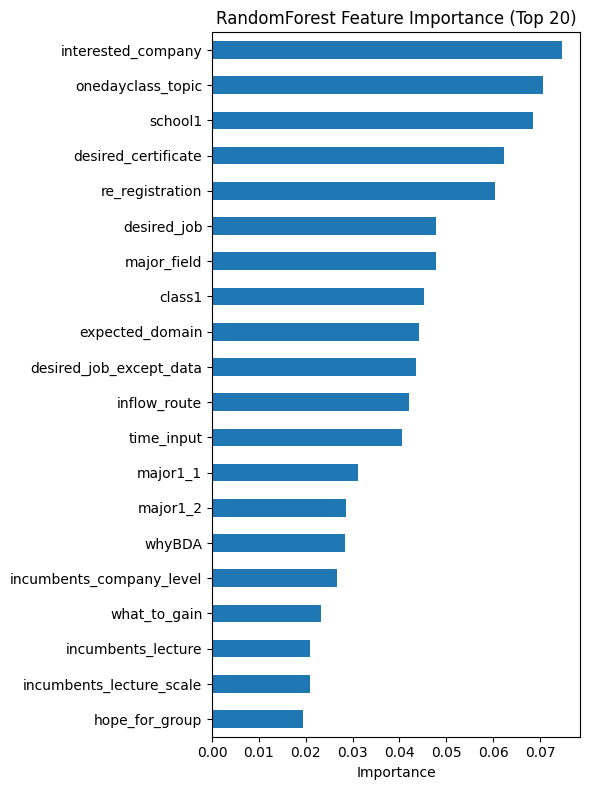

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

# 타깃 컬럼 지정
target_col = "withdrawal"
feature_cols = [c for c in train.columns if c != target_col]

X_train = train[feature_cols]
y_train = train[target_col]

# 모델 학습
rf = RandomForestClassifier(
    n_estimators=500,
    max_features="sqrt",
    class_weight="balanced",   # 클래스 불균형 고려
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# 변수 중요도 (Gini 기반)
importances = pd.Series(rf.feature_importances_, index=feature_cols)\
                .sort_values(ascending=False)

print(importances)

# 시각화 (상위 20개)
import matplotlib.pyplot as plt
topn = 20
importances.head(topn).sort_values().plot.barh(figsize=(6, 8))
plt.title("RandomForest Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## 4-1. 데이터 분할

In [ ]:
# 중요도 기준 상위 20개 피처 추출
top20_features = importances.head(20).index.tolist()
print("선택된 피처:", top20_features)

# train, test에서 해당 피처만 사용
X_train_top20 = train[top20_features]
y_train = train[target_col]

X_test = test[top20_features]   # test에도 동일 적용

선택된 피처: ['interested_company', 'onedayclass_topic', 'school1', 'desired_certificate', 're_registration', 'desired_job', 'major_field', 'class1', 'expected_domain', 'desired_job_except_data', 'inflow_route', 'time_input', 'major1_1', 'major1_2', 'whyBDA', 'incumbents_company_level', 'what_to_gain', 'incumbents_lecture', 'incumbents_lecture_scale', 'hope_for_group']


In [ ]:
# 스케일링(필요시)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top20)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

# 학습/검증 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_top20, y_train, test_size=0.2, random_state=42, stratify=y_train
    # 클래스 불균형 고려 stratify
)

## (1) 단일 모델: CatBoost, LightGBM + cb와 lgbm voting 시도

3가지 모델 중 Catboost > Voting(cat, lgbm, xgb) > LGBM > voting(cat, lgbm, logistic) 순으로 리더보드 점수가 좋았음

validation으로 확인한 f1-score는 voting, cat, lgbm 순으로 높았음

보팅에서 어떤 조합이든 매우 과적합이 발생함

catboost는 피처 선별 안 했을 때 public 점수가 잘 나왔음



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
X_train = train.drop(['withdrawal'], axis = 1)
y_train = train['withdrawal']

In [ ]:
X_test = test

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

X_oof = X_train.copy()
y_oof = y_train.copy()

# 범주형 컬럼 인덱스
cat_idx = [X_oof.columns.get_loc(col) for col in label_cols if col in X_oof.columns]

# y분포의 불균형을 고려해, stratifiedkfold 사용
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X_oof))

for fold, (train_idx, val_idx) in enumerate(kf.split(X_oof, y_oof), 1):
    print(f"Fold {fold}")

    X_tr, X_val_fold = X_oof.iloc[train_idx], X_oof.iloc[val_idx]
    y_tr, y_val_fold = y_oof.iloc[train_idx], y_oof.iloc[val_idx]

    train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
    val_pool   = Pool(X_val_fold, y_val_fold, cat_features=cat_idx)

    cb = CatBoostClassifier(
        iterations=1500,
        learning_rate=0.05,
        depth=6,
        eval_metric='F1',
        random_seed=42,
        verbose=100,
        grow_policy='Depthwise',
        early_stopping_rounds=100
        #loss_function = 'Logloss'
    )

    cb.fit(train_pool, eval_set=val_pool, use_best_model=True)

    # 예측
    oof_preds[val_idx] = cb.predict(val_pool)

# 계산
f1 = f1_score(y_oof, oof_preds)
print(f"OOF F1 Score: {f1:.4f}")

accuracy = accuracy_score(y_oof, oof_preds)
print(f"OOF Accuracy Score: {accuracy:.4f}")

Fold 1
0:	learn: 0.8131267	test: 0.8086643	best: 0.8086643 (0)	total: 40.8ms	remaining: 1m 1s
100:	learn: 0.8780952	test: 0.8100358	best: 0.8197880 (62)	total: 1.38s	remaining: 19.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8197879859
bestIteration = 62

Shrink model to first 63 iterations.
Fold 2
0:	learn: 0.8200000	test: 0.8158845	best: 0.8158845 (0)	total: 18.4ms	remaining: 27.5s
100:	learn: 0.8842105	test: 0.8156028	best: 0.8201439 (1)	total: 1.42s	remaining: 19.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8201438849
bestIteration = 1

Shrink model to first 2 iterations.
Fold 3
0:	learn: 0.8167442	test: 0.7938931	best: 0.7938931 (0)	total: 9.34ms	remaining: 14s
100:	learn: 0.8842105	test: 0.8057554	best: 0.8185053 (51)	total: 669ms	remaining: 9.27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8185053381
bestIteration = 51

Shrink model to first 52 iterations.
Fold 4
0:	learn: 0.8232044	test: 0.7925926	be

In [ ]:
oof_preds[val_idx]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
cb_submission = pd.read_csv('sample_submission.csv')

test_preds = cb.predict(X_test)

cb_submission['withdrawal'] = test_preds

cb_submission.to_csv("cb_final.csv", index=False)

## (2) Stacking

최고점수 0.645

* 전반적으로 스태킹 조합 성능이 높지 않았음.

* 랜덤포레스트 상위20 피처 선택 후, RF + LGBM + SVC → meta: LR 로 조합한 모델.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

* 상위20개 피처만 사용해보기

In [ ]:
# 전체 unique class 목록 확보
classes = sorted(y_train.unique())

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [ ]:
from sklearn.model_selection import train_test_split

# 학습/검증 분리
X_train_20, X_valid_20, y_train_20, y_valid_20 = train_test_split(
    X_train_top20, y_train, test_size=0.2, random_state=42, stratify=y
    # 클래스 불균형 고려 stratify
)

In [ ]:
# 피처 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_20_scaled = scaler.fit_transform(X_train_20)
X_valid_20_scaled = scaler.transform(X_valid_20)
X_test_top20_scaled = scaler.transform(X_test_top20)

In [ ]:
#개별 ML 모델 생성
base_rf_3=RandomForestClassifier(random_state=42)
base_xgb_3=XGBClassifier(random_state=42)
base_lgbm_3=LGBMClassifier(random_state=42,verbose=-1)
base_svc_3=SVC(random_state=42)
base_lr_3=LogisticRegression(random_state=42)

#스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final_3=LogisticRegression(random_state=42)

base_rf_3.fit(X_train_20_scaled, y_train_20)
base_xgb_3.fit(X_train_20_scaled, y_train_20)
base_lgbm_3.fit(X_train_20_scaled, y_train_20)
base_svc_3.fit(X_train_20_scaled, y_train_20)
base_lr_3.fit(X_train_20_scaled, y_train_20)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [ ]:
# 추가 base 모델 학습

base_knn_3=KNeighborsClassifier()
base_cb_3=CatBoostClassifier(random_state=42,verbose=0)

base_knn_3.fit(X_train_20, y_train_20)
base_cb_3.fit(X_train_20, y_train_20)

In [ ]:
base_knn_3_scaled=KNeighborsClassifier()
base_cb_3_scaled=CatBoostClassifier(random_state=42,verbose=0)

base_knn_3_scaled.fit(X_train_20_scaled, y_train_20)
base_cb_3_scaled.fit(X_train_20_scaled, y_train_20)

In [ ]:
# <조합> RF + LGBM + SVC → meta: LR

from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

stacking_clf_20 = StackingClassifier(
    estimators=[
        ('rf', base_rf_3),
        ('lgbm', base_lgbm_3),
        ('svc', base_svc_3)
    ],
    final_estimator=lr_final_3,
    cv=5,
    n_jobs=-1
)

stacking_scores_20 = cross_val_score(stacking_clf_20, X_train_20_scaled, y_train_20, cv=5, scoring='f1')
print("\n평균 정확도:", stacking_scores_20.mean())


평균 정확도: 0.8146318559179784


## 배깅

결과) 0.646

* 전반적으로 스태킹과 비슷하게 높은 성능을 보이지 않음.




1. 의사결정트리 중요도 확인

interested_company          1.115469e-01
re_registration             1.070590e-01
school1                     7.086089e-02
major_field                 6.184239e-02
onedayclass_topic           5.912761e-02
expected_domain             5.815388e-02
whyBDA                      5.226454e-02
desired_job                 5.103555e-02
desired_certificate         4.020449e-02
time_input                  3.856079e-02
class1                      3.765855e-02
what_to_gain                3.606498e-02
desired_job_except_data     3.591291e-02
completed_semester          3.273726e-02
major1_1                    2.700188e-02
major1_2                    2.263654e-02
contest_participitation     2.257543e-02
incumbents_lecture          2.213593e-02
inflow_route                2.047706e-02
incumbents_company_level    1.875154e-02
desired_career_path         1.860481e-02
incumbents_lecture_type     1.210024e-02
certificate_acquisition     9.953213e-03
incumbents_lecture_scale    9.495991e-03
certificate_stud

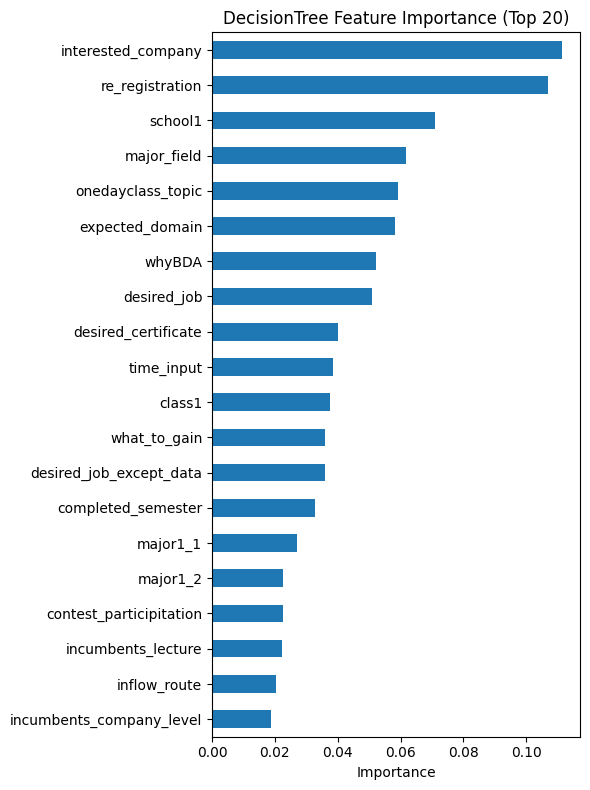

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

# 타깃 컬럼 지정
target_col = "withdrawal"
feature_cols = [c for c in train.columns if c != target_col]

X_train = train[feature_cols]
y_train = train[target_col]

# 모델 학습
dt = DecisionTreeClassifier(
    class_weight="balanced",   # 클래스 불균형 고려
    random_state=42
)
dt.fit(X_train, y_train)

# 변수 중요도 (Gini 기반)
importances = pd.Series(dt.feature_importances_, index=feature_cols)\
                .sort_values(ascending=False)

print(importances)

# 시각화 (상위 20개)
import matplotlib.pyplot as plt
topn = 20
importances.head(topn).sort_values().plot.barh(figsize=(6, 8))
plt.title("DecisionTree Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

* 데이터 분할

In [ ]:
X = train.drop('withdrawal', axis=1)
y = train['withdrawal']
X_test = test.copy()

In [ ]:
# 모든 피처 포함
from sklearn.model_selection import train_test_split

# 학습/검증 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    # 클래스 불균형 고려 stratify
)



---



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 기본 모델 후보들
dt = DecisionTreeClassifier()
lr = LogisticRegression()
nb = CategoricalNB()
svm = SVC()
knn = KNeighborsClassifier()

In [ ]:
# 의사결정 트리
bag_dt = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_dt.fit(X_train, y_train)
y_pred = bag_dt.predict(X_valid)
bag_dt.oob_score_

0.6519138755980861



---


* 하이퍼 파라미터 튜닝

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 14.3 MB/s eta 0:00:00


In [ ]:
## 하이퍼 파라미터 튜닝
import optuna
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 예시 데이터 (학습자 철회 여부 데이터셋으로 교체)
X, y = make_classification(n_samples=1045, n_features=20,
                           n_informative=10, n_redundant=5,
                           random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

def objective(trial):
    # Bagging 하이퍼파라미터 탐색 공간
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_samples = trial.suggest_float("max_samples", 0.5, 1.0)
    max_features = trial.suggest_float("max_features", 0.5, 1.0)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Base learner (Decision Tree)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    base_estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    model = BaggingClassifier(
        base_estimator,
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    # 교차검증 (Stratified K-Fold 사용 권장)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=cv,
                            scoring="accuracy", n_jobs=-1).mean()
    return score

# Optuna 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_trial.params)
print("Best CV accuracy:", study.best_value)

[I 2025-09-25 14:23:17,133] A new study created in memory with name: no-name-fbb04b8a-7bce-4e13-8e53-463f6c92acca
[I 2025-09-25 14:23:27,197] Trial 0 finished with value: 0.8839820359281438 and parameters: {'n_estimators': 150, 'max_samples': 0.7190625584022341, 'max_features': 0.906504296232277, 'bootstrap': False, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8839820359281438.
[I 2025-09-25 14:23:28,720] Trial 1 finished with value: 0.870815511833476 and parameters: {'n_estimators': 44, 'max_samples': 0.605551486655195, 'max_features': 0.611921568706296, 'bootstrap': False, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8839820359281438.
[I 2025-09-25 14:23:37,378] Trial 2 finished with value: 0.8959580838323353 and parameters: {'n_estimators': 198, 'max_samples': 0.9720138833686506, 'max_features': 0.7799604319397797, 'bootstrap': True, 'max_depth': 7, 'min_samples_split': 14, 'min_sample

Best hyperparameters: {'n_estimators': 69, 'max_samples': 0.8277418457466778, 'max_features': 0.8682741019221507, 'bootstrap': True, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1}
Best CV accuracy: 0.9127245508982036


In [ ]:
# 하이퍼 파라미터 튜닝 후 학습
from sklearn.metrics import accuracy_score, classification_report
best_params = study.best_trial.params
# 최적 트리 설정
best_dt = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42
)


# 최적 BaggingClassifier 설정
best_dt_model = BaggingClassifier(
    best_dt,
    n_estimators=best_params["n_estimators"],
    max_samples=best_params["max_samples"],
    max_features=best_params["max_features"],
    bootstrap=best_params["bootstrap"],
    random_state=42,
    n_jobs=-1
)

# 최종 학습 (train 전체 데이터 사용)
best_dt_model.fit(X_train, y_train)

# 검증 성능 확인
y_pred = best_dt_model.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.47      0.14      0.21        65
           1       0.71      0.93      0.80       144

    accuracy                           0.68       209
   macro avg       0.59      0.53      0.51       209
weighted avg       0.63      0.68      0.62       209



## (3) 앙상블

## voting
- 리더보드 점수: 0.57999
- 앙상블 보팅 모델은 적합한 모델이 아님을 알 수 있었음
- XGboost, Random Forest, Logistic Regression 모델 조합의 리더보드 점수가 제일 높았음

##**XGboost, Random Forest, Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# 개별 모델 정의
clf1 = LogisticRegression(
    max_iter=2000,       # 학습 안정화
    solver='lbfgs',      # 다중 클래스 지원, 안정적
    penalty='l2',        # L2 규제
    C=0.5,               # 규제 강도 (작을수록 규제가 강함, 과적합 방지)
    random_state=42
)
clf2 = RandomForestClassifier(
    n_estimators=500,       # 트리 개수 증가
    max_depth=15,           # 트리 최대 깊이 제한
    min_samples_split=10,   # 분할 최소 샘플 수
    min_samples_leaf=4,     # 리프 노드 최소 샘플 수
    max_features='sqrt',    # 특성 선택 방식
    bootstrap=True,         # 배깅 적용
    random_state=42,
    n_jobs=-1               # 병렬 처리
)
clf3 = XGBClassifier(
    n_estimators=1000,        # 충분히 크게
    learning_rate=0.03,       # 낮추고 트리 개수 늘려서 안정적 학습
    max_depth=6,              # 트리 깊이 제한
    subsample=0.8,            # 데이터 샘플링 비율
    colsample_bytree=0.8,     # 피처 샘플링 비율
    gamma=1,                  # 분할 최소 손실 감소
    reg_alpha=0.1,            # L1 규제
    reg_lambda=1.0,           # L2 규제
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

**(1) 하드 보팅**

In [ ]:
hard_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)],
    voting='hard'
)

hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_valid)

**(2) 소프트 보팅**

In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)],
    voting='soft'
)

soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_valid)

In [ ]:
print("=== Hard Voting ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_hard))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_hard))
print(classification_report(y_valid, y_pred_hard))

print("\n=== Soft Voting ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_soft))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_soft))
print(classification_report(y_valid, y_pred_soft))

=== Hard Voting ===
Accuracy: 0.6985645933014354
Confusion Matrix:
 [[  4  61]
 [  2 142]]
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        65
           1       0.70      0.99      0.82       144

    accuracy                           0.70       209
   macro avg       0.68      0.52      0.47       209
weighted avg       0.69      0.70      0.60       209


=== Soft Voting ===
Accuracy: 0.7033492822966507
Confusion Matrix:
 [[  6  59]
 [  3 141]]
              precision    recall  f1-score   support

           0       0.67      0.09      0.16        65
           1       0.70      0.98      0.82       144

    accuracy                           0.70       209
   macro avg       0.69      0.54      0.49       209
weighted avg       0.69      0.70      0.62       209



In [ ]:
from sklearn.ensemble import VotingClassifier
import pandas as pd

# 보팅 모델 정의 (Hard/Soft 둘 다 가능)
soft_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)],
    voting='soft',   # 'hard'도 가능, 하지만 확률 기반 soft가 보통 성능이 좋음
    n_jobs=-1
)

# 전체 train 데이터로 학습
soft_voting_clf.fit(X, y)

# test 데이터 불러오기 (대회에서 제공된 test.csv 전처리 완료본)
X_test = test[top20_features]

# 예측
y_test_pred = soft_voting_clf.predict(X_test)

# sample_submission 불러오기
submission = pd.read_csv("sample_submission.csv")

# 두 번째 컬럼에 예측값 채우기
submission.iloc[:, 1] = y_test_pred

# 저장
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv 저장 완료!")

## (4) RandomForest 최적화

- RandomForest, LogisticRegrssion을 이용하여 단일 모델 성능 비교

- RandomForet의 성능이 더 좋음 -> RandomForest 최적화 결정

- RandomForest, LogisticRegrssion, LightGBM을 이용하여 앙상블 시도

- RandomForest 단일 모델보다 성능이 좋지 않음

- 기타 최적화 시도: 특성 선택, 임계값 최적화, 배깅 앙상블 등 -> 성능 개선 없음

✅ 최종 모델: 피처 선택 + RandomForest

In [ ]:
y_train = train['withdrawal']
X_train = train.drop('withdrawal', axis=1)
X_test = test.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# 학습/검증 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    # 클래스 불균형 고려 stratify
)

In [ ]:
# 라이브러리 임포트
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# --- 1. 교차 검증 및 모델링 준비 ---
# StratifiedKFold: 교차 검증 시 각 폴드의 클래스 비율을 원본과 동일하게 유지
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 평가지표를 F1 Score로 설정
f1_scorer = make_scorer(f1_score)

In [ ]:
# --- 2. 모델링 및 하이퍼파라미터 튜닝: Random Forest ---
print("[Random Forest 모델 학습 시작]")

# Random Forest 모델 생성
# class_weight='balanced': 클래스 불균형을 자동으로 처리
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 튜닝할 하이퍼파라미터 그리드 설정
# n_estimators: 트리의 개수
# max_depth: 트리의 최대 깊이
# min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 수
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None], # None은 깊이 제한 없음
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용해 최적의 파라미터 탐색
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=f1_scorer,
    cv=cv_strategy,
    n_jobs=-1
)

# 학습 시작
grid_search_rf.fit(X_train, y_train)

# 결과 출력
print(f"최적 하이퍼파라미터: {grid_search_rf.best_params_}")
print(f"최고 교차 검증 F1 Score: {grid_search_rf.best_score_:.4f}")
print("-" * 30)

[Random Forest 모델 학습 시작]
최적 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
최고 교차 검증 F1 Score: 0.8092
------------------------------


In [ ]:
def tune_threshold(proba, y_true):
    ths = np.linspace(0.05, 0.5, 46)
    best_f1 = -1
    best_th = 0.1
    for t in ths:
        score = f1_score(y_true, (proba >= t).astype(int))
        if score > best_f1:
            best_f1 = score
            best_th = t
    return best_th

In [ ]:
# --- 공통 설정 ---
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)


# --- 1. 기준선 모델 (SMOTE 미적용 랜덤포레스트) ---
print("[Step 1] 기준선 모델(Random Forest) 성능 확인")

# 이전 단계에서 찾은 최적의 파라미터를 기반으로 탐색 범위 설정
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_leaf': [1, 2]
}
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=f1_scorer,
    cv=cv_strategy
)
grid_search_rf.fit(X_train, y_train)
baseline_f1_score = grid_search_rf.best_score_

print(f"최적 하이퍼파라미터: {grid_search_rf.best_params_}")
print(f"기준선 교차 검증 F1 Score: {baseline_f1_score:.4f}")
print("-" * 50)

[Step 1] 기준선 모델(Random Forest) 성능 확인
최적 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
기준선 교차 검증 F1 Score: 0.8092
--------------------------------------------------


[Step 3] 특성 중요도 분석 및 선택
특성 중요도 (높은 순):
onedayclass_topic           0.070900
interested_company          0.070299
school1                     0.065681
desired_certificate         0.062484
re_registration             0.059377
class1                      0.049472
major_field                 0.048562
desired_job                 0.048236
expected_domain             0.042661
desired_job_except_data     0.042516
time_input                  0.042298
inflow_route                0.040492
major1_1                    0.034104
whyBDA                      0.028375
major1_2                    0.027638
incumbents_company_level    0.026343
incumbents_lecture          0.021728
what_to_gain                0.021355
incumbents_lecture_scale    0.021036
hope_for_group              0.020300
contest_participitation     0.019733
completed_semester          0.018156
incumbents_lecture_type     0.017725
desired_career_path         0.015126
certificate_acquisition     0.014986
incumbents_level            0.014823

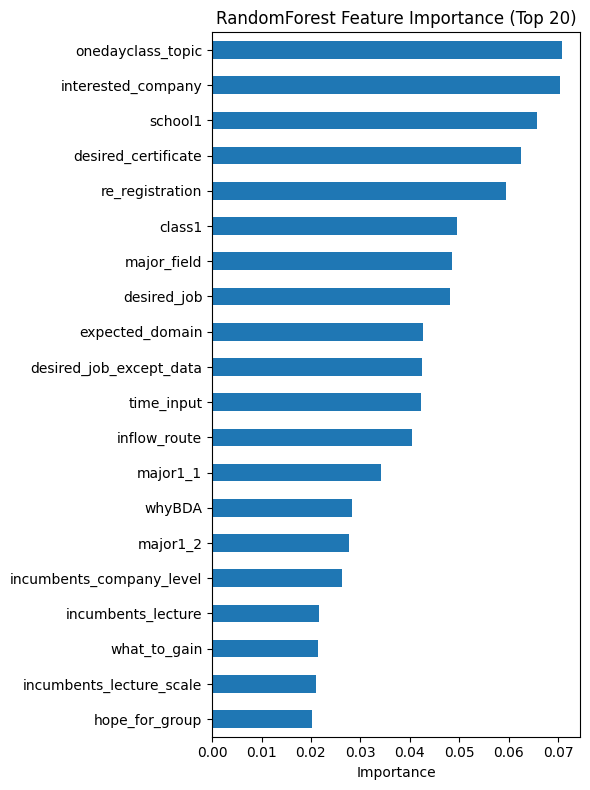


선택된 주요 특성 (31개): ['onedayclass_topic', 'interested_company', 'school1', 'desired_certificate', 're_registration', 'class1', 'major_field', 'desired_job', 'expected_domain', 'desired_job_except_data', 'time_input', 'inflow_route', 'major1_1', 'whyBDA', 'major1_2', 'incumbents_company_level', 'incumbents_lecture', 'what_to_gain', 'incumbents_lecture_scale', 'hope_for_group', 'contest_participitation', 'completed_semester', 'incumbents_lecture_type', 'desired_career_path', 'certificate_acquisition', 'incumbents_level', 'major type', 'certificate_study_period', 'project_type', 'major_data', 'job']
특성 선택 후 X_train shape: (836, 31)
--------------------------------------------------


In [ ]:
# --- 2: 특성 중요도 analysis and selection ---
print("[Step 3] 특성 중요도 분석 및 선택")

# Step 1에서 찾은 최적의 모델을 가져옴
best_rf_model = grid_search_rf.best_estimator_

# 특성 중요도 확인
# Use the original training data feature column names
feature_cols = [col for col in train.columns if col != 'withdrawal']
feature_importances = pd.Series(best_rf_model.feature_importances_, index=feature_cols)
feature_importances = feature_importances.sort_values(ascending=False)

print("특성 중요도 (높은 순):")
print(feature_importances)

# 시각화
import matplotlib.pyplot as plt
topn = 20
feature_importances.head(topn).sort_values().plot.barh(figsize=(6, 8))
plt.title("RandomForest Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 중요도가 0.005 이상인 특성만 선택
important_features = feature_importances[feature_importances > 0.005].index.tolist()

if len(important_features) == 0: # 모든 특성의 중요도가 0.005 미만일 경우 상위 5개 선택
    important_features = feature_importances.head(5).index.tolist()

print(f"\n선택된 주요 특성 ({len(important_features)}개): {important_features}")

# 선택된 특성으로 새로운 데이터셋 생성
# Use the original training data for selecting columns
X_train_selected = X_train[important_features]
X_valid_selected = X_valid[important_features]
X_test_selected = test[important_features] # Use test.columns for X_test_scaled

print(f"특성 선택 후 X_train shape: {X_train_selected.shape}")
print("-" * 50)

In [ ]:
# --- 3. 선택된 특성으로 모델 학습 ---
print("[Step 4] 선택된 특성으로 최종 모델 재학습")

selected_rf = RandomForestClassifier(random_state=42,
                                     class_weight='balanced',
                                     n_jobs=-1,
                                     max_depth=None,
                                     min_samples_leaf=1,
                                     n_estimators=200)

selected_rf.fit(X_train_selected, y_train)
pred = selected_rf.predict(X_valid_selected)

f1 = f1_score(y_valid, pred)
print(f"검증 데이터 F1 Score: {f1:.4f}")

[Step 4] 선택된 특성으로 최종 모델 재학습
검증 데이터 F1 Score: 0.8208


In [ ]:
final_pred = selected_rf.predict(X_test_selected)

In [ ]:
sample_submission['withdrawal'] = final_pred

In [ ]:
print("클래스별 개수:")
print(sample_submission['withdrawal'].value_counts())

print("클래스별 비율:")
print(sample_submission['withdrawal'].value_counts(normalize=True))

클래스별 개수:
withdrawal
1    780
0      8
Name: count, dtype: int64
클래스별 비율:
withdrawal
1    0.989848
0    0.010152
Name: proportion, dtype: float64


In [ ]:
sample_submission.to_csv('submission_RF_Final.csv', index=False)

## 결론

* 단일모델과 앙상블 모두 시도한 결과, 랜덤포레스트 단일 모델로 학습하는 것의 성능이 제일 좋았음.

* 피처 중요도 기준으로 피처를 선별한 후, 랜덤포레스트로 학습한 알고리즘이 0.649 (프라이빗 9위) 기록.